# Exercise 1  - Loading and plotting the UCI wine dataset

## Goals

* Introduction to Google Colab
* Loading data using Pandas
* Indexing Pandas DataFrames
* Creating scatter plots using matplotlib

Before we get started, you'll need to install `scprep` by running the following command (press **Shift-Enter** to run the cell.)

In [0]:
!pip install --user scprep

     |████████████████████████████████| 102kB 3.1MB/s 


After installing, you will need to restart the notebook by clicking `Restart Runtime` under Runtime menu in the top navigation bar.

## 1. Loading [the UCI wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

### Imports
(Almost) everything in Python is imported. These lines load modules from four libraries:
* `numpy` - *the* library for numerical computing in Python
* `pandas` - a library for organizing and manipulating data
* `matplotlib` - a library for plotting
* `sklearn` - short for scikit-learn, a machine learning toolkit in Python

In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

### Loading the data from sklearn into a pandas DataFrame

The core of pandas is the [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). The `DataFrame` is a two-dimensional container for data that is organized into rows and columns. Generally speaking, rows should correspond to observations in a DataFrame, and columns should correspond to the features of variables of the data.

#### Load data

In [0]:
wine = datasets.load_wine()

#### Extract information to put in DataFrame
When you load data from sklearn, it is packaged into a [Bunch object](https://scikit-learn.org/dev/modules/generated/sklearn.utils.Bunch.html) (like a dictionary). We want to convert the data in a pandas DataFrame so we can work with it easily.

In [0]:
# Access the numerical data from the wine Bunch
data = wine['data']

data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [0]:
# Load data about the rows and columns
feature_names = wine['feature_names']

# Load cultivar information about each wine
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])

# Create nice names for each row
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])

#### Create DataFrame

In [0]:
# Gather all of this information into a DataFrame
data = pd.DataFrame(data, columns=feature_names, index=wine_names)

# Print the first 5 rows of the data, eq. to data[:5]
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
Wine1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
Wine2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
Wine3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
Wine4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## 2. Looking at the data in the DataFrame

In [0]:
# Access the 'total_phenols' column for all wines
#
# [] extracts column(s) of DataFrame by name
# simply put the name of the column in-between the brackets
data['total_phenols']

Wine0      2.80
Wine1      2.65
Wine2      2.80
Wine3      3.85
Wine4      2.80
           ... 
Wine173    1.68
Wine174    1.80
Wine175    1.59
Wine176    1.65
Wine177    2.05
Name: total_phenols, Length: 178, dtype: float64

In [0]:
# Access the first 6 wines
#
# .iloc[] works on the positions in your index. 
# This means that if you give in iloc[2], you look for the row of your 
# DataFrame that is at index 2. 
# :6 specifies that we want rows with index from 0 to 5 (i.e. 0 until 6).
data.iloc[:6]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Wine0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
Wine1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
Wine2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
Wine3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
Wine4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
Wine5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0


In [0]:
# Print the 'malic_acid', 'magnesium', and 'color_intensity' values for the first 3 wines
# First, select columns, then select rows
#
# You can select multiple columns as a DataFrame by passing a list to it, e.g. 
# df[['col_name1', 'col_name2']]
# When used with slicing operation on a DataFrame, [] selects the rows
data[['malic_acid', 'magnesium', 'color_intensity']][:3]

,malic_acid,magnesium,color_intensity
Wine0,1.71,127.0,5.64
Wine1,1.78,100.0,4.38
Wine2,2.36,101.0,5.68


### Exercise 1 - Print the 'proanthocyanins' and 'flavanoids' for wines 100-111

In [0]:
# ===============
# select the appropriate columns with the data['column'] syntax and the appropriate wines with [] indexing
data[["proanthocyanins", "flavanoids"]][100:112]
# ===============

,proanthocyanins,flavanoids
Wine100,1.40,2.17
Wine101,1.35,1.36
Wine102,1.31,2.11
Wine103,1.42,1.64
Wine104,1.48,1.92
Wine105,1.42,1.84
Wine106,1.63,2.03
Wine107,1.63,1.76
Wine108,2.08,2.04
Wine109,2.49,2.92


More readings on indexing and selecting data: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

## 3. Introduction to plotting data

We're not going to go in depth on plotting, because that could take a full day to go through. There are plenty of online learning resources of getting the hang of matplotlib, though. 

We recommend:
* [The official matplotlib pyplot tutorial](https://matplotlib.org/users/pyplot_tutorial.html)
* [The free Cognitive Class Data Visualization Course](https://cognitiveclass.ai/courses/data-visualization-with-python)

### Exercise 2 - Plot the alcohol and hue of the first 10 wines in the dataset

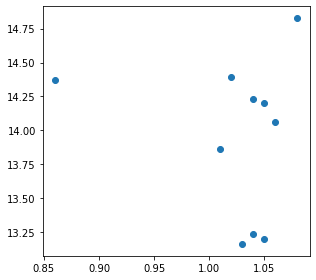

In [0]:
# ===============
# Get the first 10 rows and the 'hue' and 'alcohol' columns of the data
plotting_data = data[["hue", "alcohol"]][:10]
# ===============

# Create the Figure and Axis objects
fig, ax = plt.subplots(1, figsize=(4.5,4))

# Call the scatter() method of the axis object
ax.scatter(plotting_data.iloc[:,0], plotting_data.iloc[:,1])

# If you were running this on your computer, you could save the images
fig.tight_layout()

## 4. Introducing `scprep`

`scprep` is a toolkit for analysis of single cell data. It's open source and publicly available on GitHub at https://github.com/KrishnaswamyLab/scprep. You can install this using pip with `pip install scprep`.

Like most packages, `scprep` is divided into modules. You can find a full list of the available modules and documentation in the `scprep` documentation at https://scprep.readthedocs.io/.

### Plot the alcohol and hue of all wines in the dataset *using scprep*

It will be helpful for you to look at [the documentation for `scprep.plot.scatter2d()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter2d).

In [0]:
import scprep

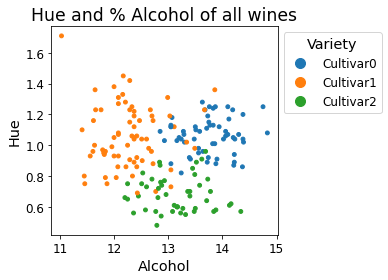

In [0]:
# =======
# replace '...' with the correct code
scprep.plot.scatter2d( data[["alcohol", "hue"]] , 
                     c=cultivars, # We created this when importing the wine data
                     title='Hue and % Alcohol of all wines', # Goes at the top
                     xlabel='Alcohol', ylabel='Hue', # Labels the x and y axis
                     # This legend_anchor position puts the legend outside the plot
                     legend_title='Variety', legend_anchor=(1,1), 
                     figsize=(5.5,4))
# =======

## Identify features that differentiate two cultivars

In the exercise, each pair per table will pick a pair of cultivars and identify features that differentiate them using histograms. 

It will be helpful for you to look at [the documentation for `scprep.plot.histogram()`](https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.histogram).

As a pair:
1. Pick two of the three cultivars to study
2. Go through the features one by one and plot their histograms (remember you can duplicate code blocks!)
3. Identify the feature that best differentiates your two cultivars (however you define 'best')
4. Once you are done, share your findings with your table

In [0]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

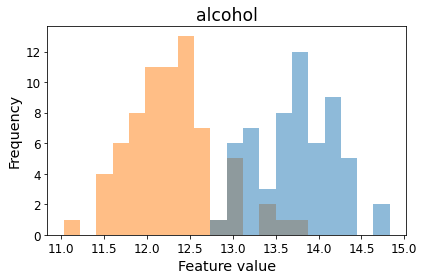

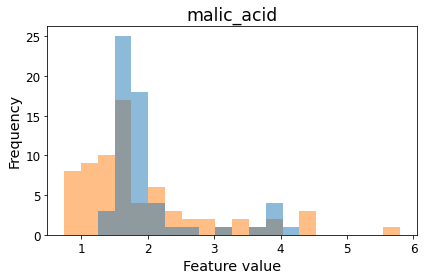

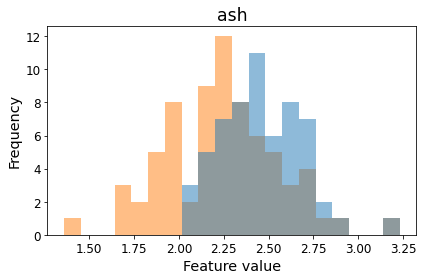

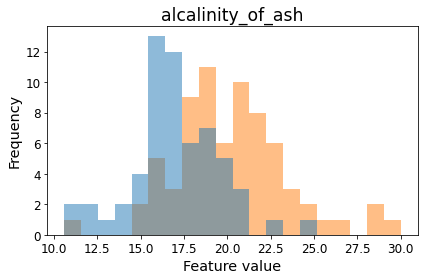

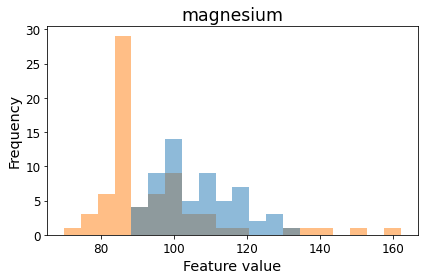

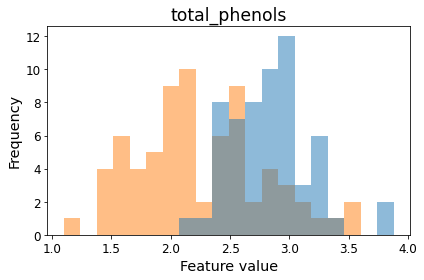

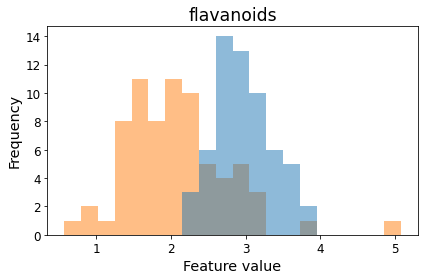

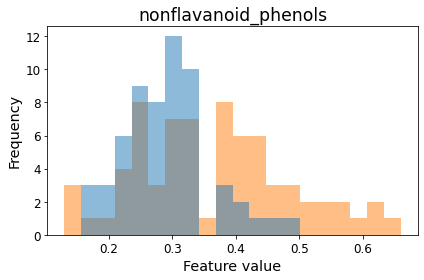

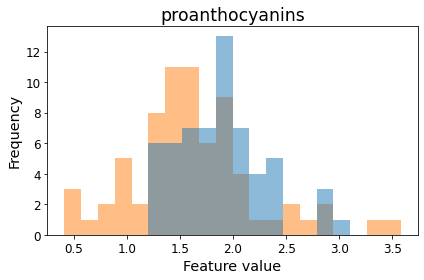

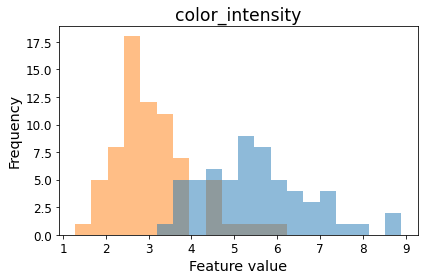

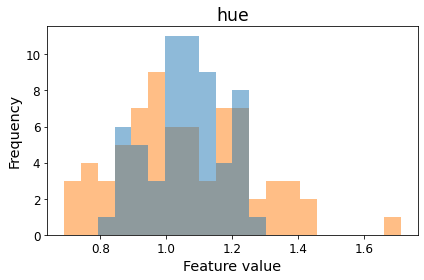

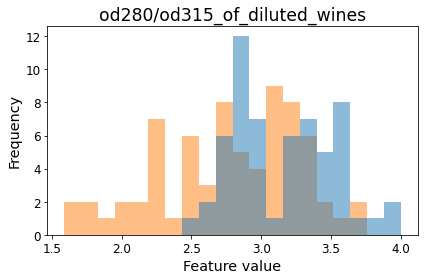

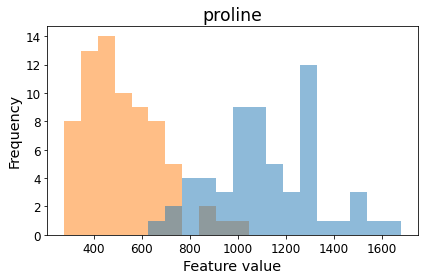

In [0]:
# Type in your desired cultivars here
a_group = 'Cultivar0'
b_group = 'Cultivar1'

for feature_name in data.columns:
  # Pick a feature in the data
  feature = data[feature_name] 
  scprep.plot.histogram([feature[cultivars == a_group], feature[cultivars == b_group]],
                      title=feature_name, bins=20,
                      xlabel='Feature value',ylabel='Frequency')

## 4. Calculating pairwise distances

To calculate pairwise distances (i.e. the distance between two points), we will use the [`pdist`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function from `scipy`. Next, we will visualize the data using a heatmap. Right now, there's no function for plotting heatmaps in `scprep`, because another package, seaborn, already has support for comprehensive plotting of heatmaps.

Package descriptions:
* [`scipy`](https://docs.scipy.org/doc/scipy/reference/index.html) - part of the same ecosystem as `numpy`. Contains many functions for scientific computing in Python including statistical computations, linear algebra, etc.
* [`seaborn`](https://seaborn.pydata.org/) - an independent plotting package for Python that wraps around `matplotlib` to create beautiful, complex plots.



### Imports

In [0]:
# we only need a couple of functions from scipy.spatial.distance, so we'll directly import them
from scipy.spatial.distance import pdist, squareform

# it is common to import seaborn as sns
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Calculating pairwise distances

In [0]:
pairwise_distances = squareform(pdist(data))

#### Plotting the heatmap

Here we're using the `clustermap` function to get the row and column colors, but turning off the clustering component with `row_cluster=False` and `col_cluster=False`.

Documentation for `clustermap` can be found here: https://seaborn.pydata.org/generated/seaborn.clustermap.html

Text(652.0000000000001, 0.5, 'Cell$_{j}$')

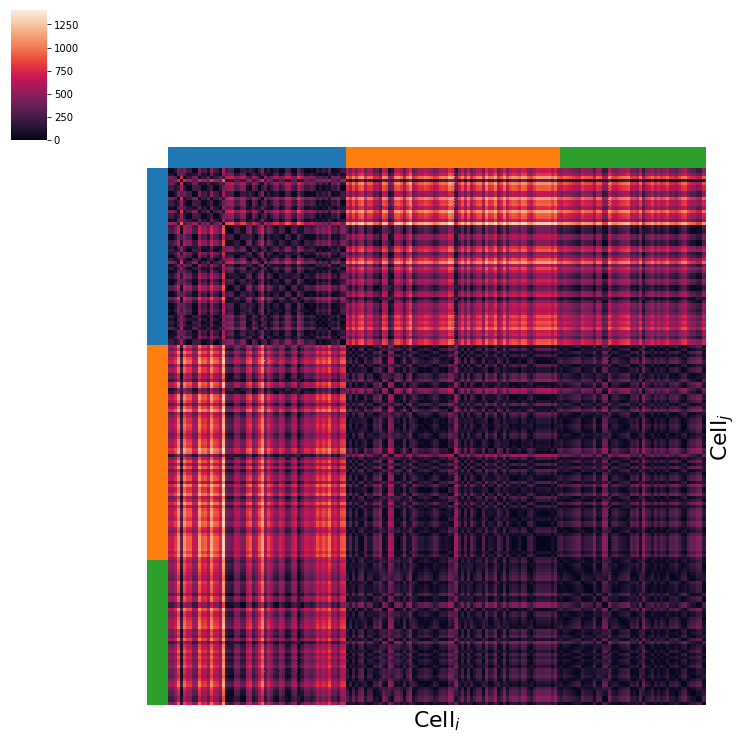

In [0]:
cg = sns.clustermap(pairwise_distances, 
               row_colors=plt.cm.tab10(wine['target']), 
               col_colors=plt.cm.tab10(wine['target']), 
               row_cluster=False, col_cluster=False,
               xticklabels=[], yticklabels=[])

cg.ax_heatmap.set_xlabel(r'Cell$_{i}$', fontsize=22)
cg.ax_heatmap.set_ylabel(r'Cell$_{j}$', fontsize=22, rotation=90)

### Discussion

Try commenting out (adding a "#" at the beginning of the line) the line that sets `row_cluster=False` and `col_cluster=False`. This will make `clustermap` automatically cluster the data. 

Discuss the following questions:
1. What do you notice about the groupings? 

Cultivar 0 is very different from cultivars 1 and 2. Cultivar 2 is sort of half way between 1 and 0, but more similar to cultivar 1.

2. Do you think the wine cultivars are "Euclidean blobs"?

Not really. They appear to be more like a Euclidean swoosh softly partitioned into three sections -- there is no clear break between the three blobs.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


Text(652.0000000000001, 0.5, 'Cell$_{j}$')

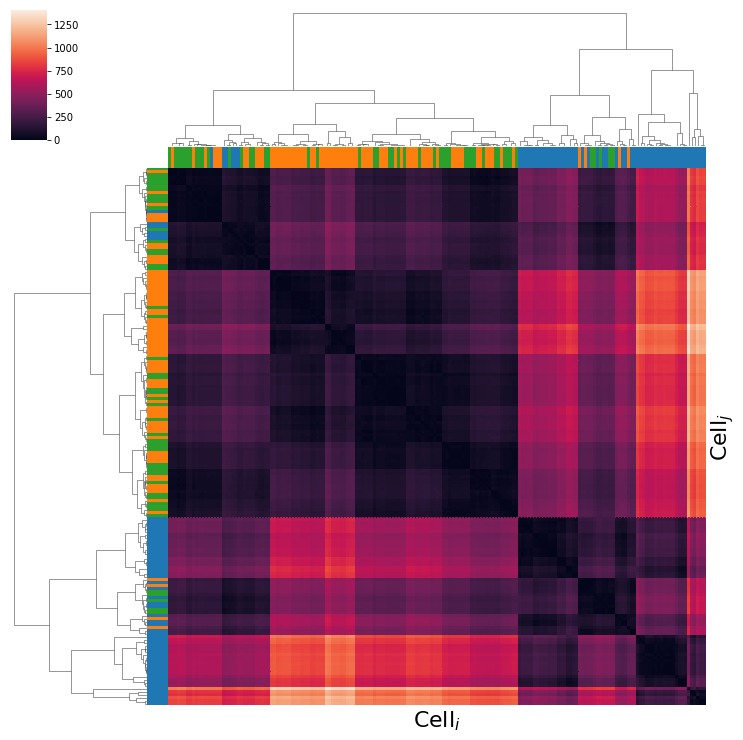

In [0]:
cg = sns.clustermap(pairwise_distances, 
               row_colors=plt.cm.tab10(wine['target']), 
               col_colors=plt.cm.tab10(wine['target']), 
               xticklabels=[], yticklabels=[])

cg.ax_heatmap.set_xlabel(r'Cell$_{i}$', fontsize=22)
cg.ax_heatmap.set_ylabel(r'Cell$_{j}$', fontsize=22, rotation=90)

### Why feature scaling is important

We'll use `sklearn`'s `StandardScaler` to z-score the features of the wine dataset. You'll see that a heatmap of the data _without_ doing this is dominated by a single high-magnitude feature, which is much less informative.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
data_scaled = StandardScaler().fit_transform(data)

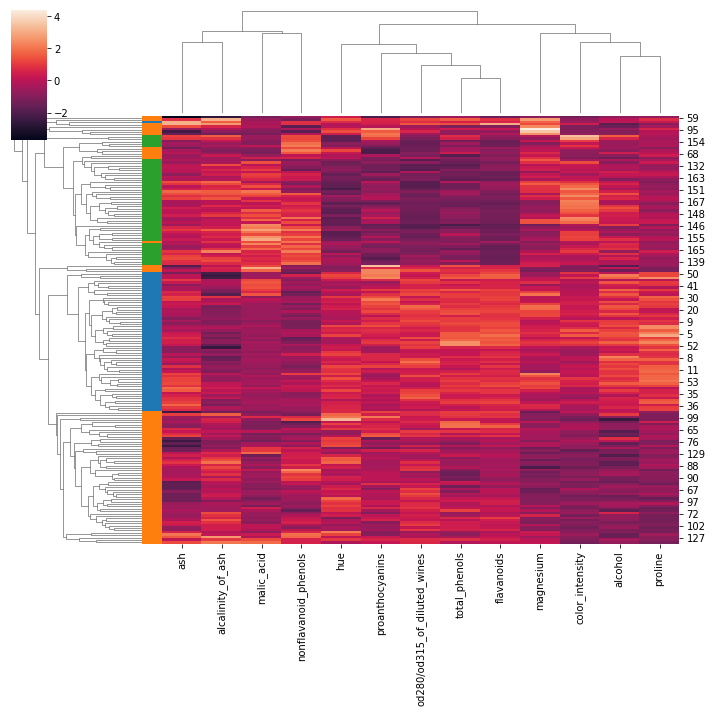

In [0]:
sns.clustermap(data_scaled, xticklabels=data.columns, row_colors=plt.cm.tab10(wine['target']))

Notice that the data clusters together (as you see by the colors on the left, which corresponds to the cultivars) quite nicely. Now let's try again without the scaling.

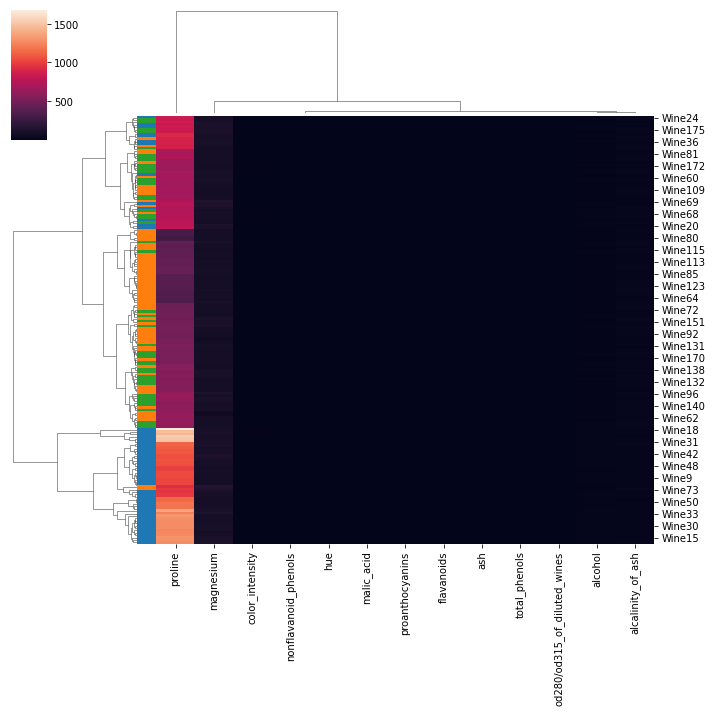

In [0]:
sns.clustermap(data, row_colors=plt.cm.tab10(wine['target']))

#### Scaling before distance calculation

We can also take another look at our pairwise distances plot and see what scaling does to the output.

Text(652.0000000000001, 0.5, 'Cell$_{j}$')

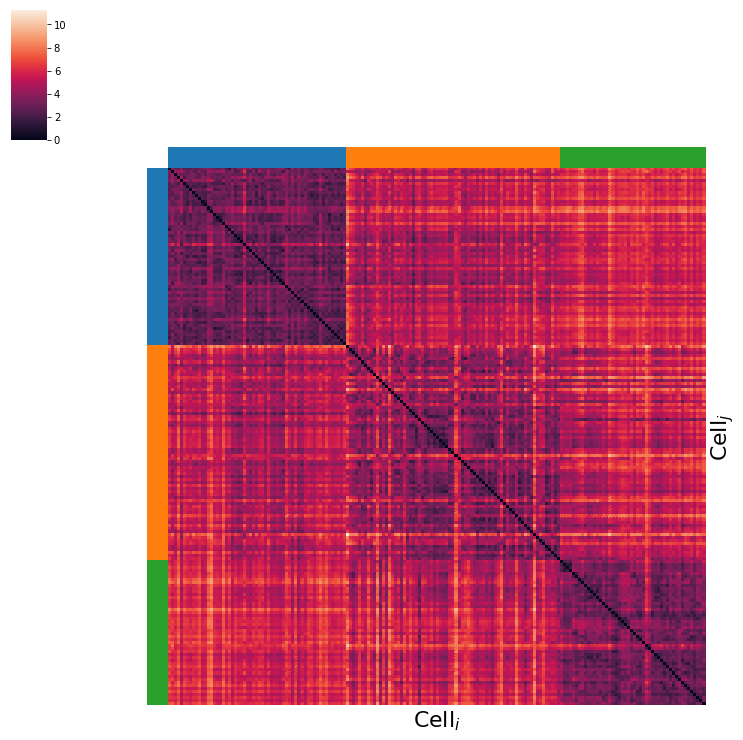

In [0]:
pairwise_distances_scaled = squareform(pdist(data_scaled))

cg = sns.clustermap(pairwise_distances_scaled, 
               row_colors=plt.cm.tab10(wine['target']), 
               col_colors=plt.cm.tab10(wine['target']), 
               row_cluster=False, col_cluster=False,
               xticklabels=[], yticklabels=[])

cg.ax_heatmap.set_xlabel(r'Cell$_{i}$', fontsize=22)
cg.ax_heatmap.set_ylabel(r'Cell$_{j}$', fontsize=22, rotation=90)

You can see that the three-cluster structure is much more clear here than when we just used the raw data, where we only really saw two obvious groups. If we allow `seaborn` to cluster the rows and columns, we'll see the structure more clearly.

### Discussion

Again, commenting out (adding a "#" at the beginning of the line) the line that sets `row_cluster=False` and `col_cluster=False`. This will make `clustermap` automatically cluster the data. 

Discuss the following questions:
1. What do you notice about the groupings? 

The separation between groups is much more clear now. Cultivars 1 and 2 are much more distinct after scaling.

2. Now do you think the wine cultivars are "Euclidean blobs"?

Yes! It's much more clear that the cultivars lie in three mostly distinct groups.

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


Text(652.0000000000001, 0.5, 'Cell$_{j}$')

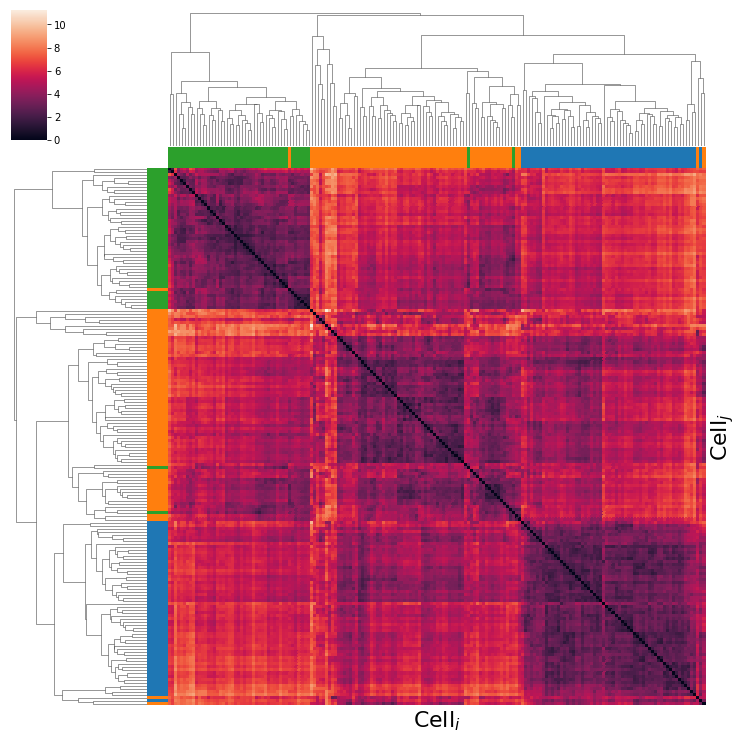

In [0]:
pairwise_distances_scaled = squareform(pdist(data_scaled))

cg = sns.clustermap(pairwise_distances_scaled, 
               row_colors=plt.cm.tab10(wine['target']), 
               col_colors=plt.cm.tab10(wine['target']),
               xticklabels=[], yticklabels=[])

cg.ax_heatmap.set_xlabel(r'Cell$_{i}$', fontsize=22)
cg.ax_heatmap.set_ylabel(r'Cell$_{j}$', fontsize=22, rotation=90)